<a href="https://colab.research.google.com/github/Paco-clod/WhatsAppChatAnalysis/blob/main/WhatsAppChatAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyse des conversations WhatsApp

Vous pouvez utiliser vos données WhatsApp pour de nombreuses tâches de science des données telles que l'analyse des sentiments , l'extraction de mots-clés , la reconnaissance d'entités nommées , l'analyse de texte et plusieurs autres tâches de traitement du langage naturel. Cela dépend également de la personne avec laquelle vous analysez vos messages WhatsApp, car vous pouvez trouver de nombreuses informations dans vos messages WhatsApp qui peuvent également vous aider à résoudre des problèmes professionnels.

#WhatsApp Chat Analysis

You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I hope you now have understood how to get your WhatsApp data for the task of WhatsApp chat analysis with Python. Now let’s start this task by importing the necessary Python libraries that we need for this task:texte en italique

In [ ]:
!pip install emoji

In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

The dataset we are using here requires a lot of preparation, so I suggest you take a look at the data you are using before starting this WhatsApp chat analysis task. As I have already walked through the dataset, so I’ll start by writing a few Python functions to prepare the data before importing it:

In [ ]:
import pandas as pd
import re

# Define a function to parse date and time
def date_time(s):
    pattern = re.compile(r'\d{2}/\d{2}/\d{4}, \d{1,2}:\d{2} (matin|après-midi|soir|nuit|minuit)')
    return bool(pattern.match(s))

# Define a function to extract date, time, author, and message
def getDatapoint(line):
    date_time_pattern = r'(\d{2}/\d{2}/\d{4}), (\d{1,2}:\d{2} (matin|après-midi|soir|nuit|minuit)) - ([^:]+): (.*)'
    match = re.match(date_time_pattern, line)
    if match:
        date = match.group(1)
        time = match.group(2)
        author = match.group(4)
        message = match.group(5)
        return date, time, author, message
    return None, None, None, None

data = []

# Open and read the file
with open('/content/drive/MyDrive/Discussion.txt', encoding="utf-8") as fp:
    fp.readline()  # Skip the first line (encrypted message info)
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# Append the last buffered message
if len(messageBuffer) > 0:
    data.append([date, time, author, ' '.join(messageBuffer)])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])

# Display the DataFrame
df.head()

,Date,Time,Author,Message
0,07/03/2024,8:04 soir,Côco💫,ça va princesse?
1,07/03/2024,8:04 soir,Côco💫,et le moral ça va?
2,07/03/2024,8:10 soir,Guètto❤,Cc coco ca Va et toi?
3,07/03/2024,8:10 soir,Guètto❤,Ta journée ça été ?
4,07/03/2024,8:36 soir,Côco💫,J'suis là héin


Our dataset is completely ready now for the task of WhatsApp chat analysis with Python. Now let’s have a look at the last 20 messages and some other insights from the data:



In [ ]:
df.head(20)

,Date,Time,Author,Message
0,07/03/2024,8:04 soir,Côco💫,ça va princesse?
1,07/03/2024,8:04 soir,Côco💫,et le moral ça va?
2,07/03/2024,8:10 soir,Guètto❤,Cc coco ca Va et toi?
3,07/03/2024,8:10 soir,Guètto❤,Ta journée ça été ?
4,07/03/2024,8:36 soir,Côco💫,J'suis là héin
5,07/03/2024,8:36 soir,Côco💫,toujours au bureau
6,07/03/2024,8:36 soir,Côco💫,et toi t'fais quoi?
7,07/03/2024,8:38 soir,Guètto❤,A l’heure là ?
8,07/03/2024,8:38 soir,Guètto❤,Je mange
9,07/03/2024,8:45 soir,Côco💫,Oui hein


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3739 non-null   object
 1   Time     3739 non-null   object
 2   Author   3739 non-null   object
 3   Message  3739 non-null   object
dtypes: object(4)
memory usage: 117.0+ KB


In [ ]:
df.Author.unique()

array(['Côco💫', 'Guètto❤'], dtype=object)

In [ ]:
df.shape

(3739, 4)

Now let’s have a look at the total number of messages between this WhatsApp chat:



In [ ]:
total_messages = df.shape[0]
print("Total messages:", total_messages)

Total messages: 3739


Now let’s have a look at the total number of media messages present in this chat:



In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
media_messages

0

Now let’s extract the emojis present in between the chats and have a look at the emojis present in this chat:

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):  # Change UNICODE_EMOJI to EMOJI_DATA
            emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
emojis

843

Now let’s extract the URLs present in this chat and have a look at the final insights:



In [ ]:

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Aman and Sapna")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Aman and Sapna
Total Messages:  3739
Number of Media Shared:  0
Number of Emojis Shared 843
Number of Links Shared 5


Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Côco💫", "Guètto❤"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)

Stats of Côco💫 -
Messages Sent 1872
Average Words per message 6.281517094017094
Media Messages Sent 0
Emojis Sent 459
Links Sent 4
Stats of Guètto❤ -
Messages Sent 1867
Average Words per message 5.12747723620782
Media Messages Sent 0
Emojis Sent 384
Links Sent 1


Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😭', 64)
('❤', 59)
('😅', 51)
('🌹', 48)
('🙏', 41)
('❤️\u200d🔥', 39)
('😍', 31)
('🤭', 31)
('🥰', 31)
('😥', 30)
('🤧', 29)
('🙇\u200d♂️', 23)
('🥲', 22)
('😒', 22)
('\U0001f979', 20)
('🥺', 20)
('💔', 18)
('👍', 17)
('🤦\u200d♂️', 16)
('😊', 15)
('😢', 14)
('😘', 14)
('♥️', 12)
('😪', 11)
('😡', 11)
('🤨', 9)
('❤️', 8)
('😂', 8)
('🤦\u200d♀️', 8)
('💋', 6)
('💞', 6)
('😹', 5)
('❣', 5)
('💗', 5)
('💖', 5)
('💓', 5)
('🥑', 4)
('🙃', 4)
('☺️', 3)
('😋', 3)
('💑', 3)
('🎉', 3)
('🎊', 3)
('😩', 3)
('👋', 3)
('🤣', 3)
('🤔', 3)
('🌙', 2)
('😌', 2)
('😄', 2)
('😀', 2)
('☹️', 2)
('💫', 2)
('🍟', 2)
('🥂', 2)
('💝', 2)
('☹', 2)
('🛏️', 1)
('🍀', 1)
('🍿', 1)
('☔️', 1)
('🍕', 1)
('🍖', 1)
('🥚', 1)
('🧊', 1)
('😲', 1)
('🤞', 1)
('🐟', 1)
('😻', 1)
('🏊\u200d♀️', 1)
('👑', 1)
('😰', 1)
('😜', 1)
('👉', 1)
('🥗', 1)
('😴', 1)
('😟', 1)
('🥛', 1)
('😎', 1)
('🍾', 1)
('🗯', 1)
('🎁', 1)
('🎂', 1)
('😔', 1)
('🍪', 1)
('🍫', 1)


Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 124662 words in all the messages.


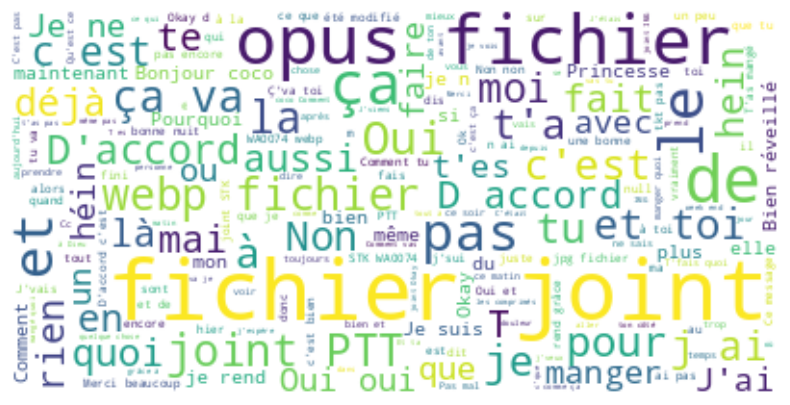

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author name Côco💫


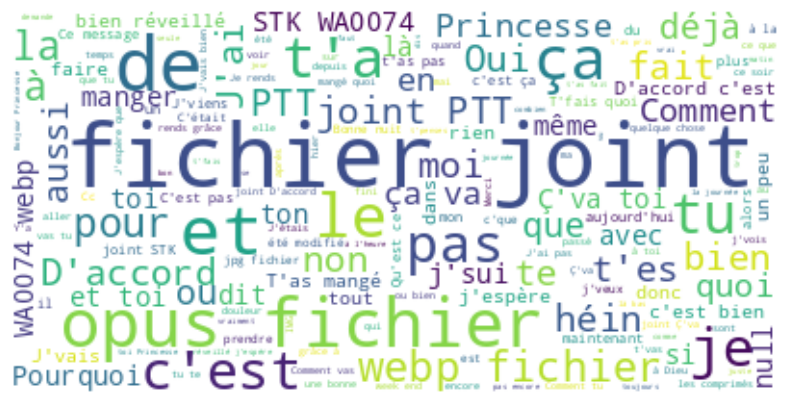

Author name Guètto❤


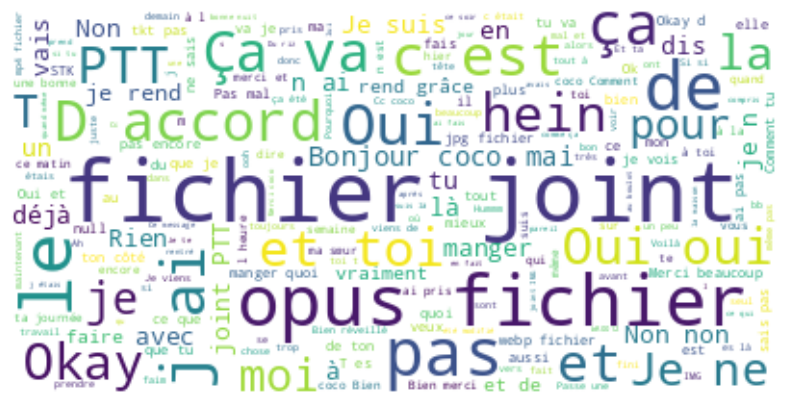

In [ ]:
l = ["Côco💫", "Guètto❤"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

#Summary

So this is how we can easily analyze any WhatsApp chat between you and your friend, customer, or even a group of people. You can further use this data for many other tasks of natural language processing.